In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

from wrangle import get_pokemon, prepare_pokemon, train_validate_test, get_object_cols, get_numeric_X_cols, ready_for_battle

I just started playing Pokemon Sword, it's nothing like I expected so far. I have no idea who any of these Pokemon are.
My starter was Scorbunny, a clearly visible fire type hyper-bunny. On the search for a perfect female Yamper, I leveled him up so much that he is now Raboot. My rival hasn't even evolved his yet...I knocked him out. 

I'm starting to train for my first gym battle. I'm a little nervous, because I know my Raboot does well against certain Pokemon, but there are some where he doesn't inflict damage as expected and I have to resort to going through my party to see who's going to take care of my opponent. 

However, Raboot is my main guy. I depend on him to do the most damage, take the least damage, and may he carry us through all of our battles so my other Pokemon can (mostly) sit out and get EXP. There are just times I really rely on my Yampers, 

but when should I pull Raboot from battle so I don't have to waste any potions/revives in case he goes up against someone he would fall against? 

I need to find out...if I am warned about who's going up against my bunny, when should I switch him out for another party member? 

I think an approach I will take is to be able to predict type_1. Since there are 18 types but only less than a thousand pokemon (not including the megas, which I still don't know the difference) I think it's best to just try to see if my model can predict if a pokemon is going to be a threat to my Raboot

In [2]:
#read the csv
df = get_pokemon()

In [3]:
#handle missing values and drop the columns we are sure we aren't using
df = prepare_pokemon(df)

In [4]:
#check
df

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,896,Glastrier,8,Sub Legendary,Wild Horse Pokémon,1,Ice,None,2.2,800.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1038,897,Spectrier,8,Sub Legendary,Swift Horse Pokémon,1,Ghost,None,2.0,44.5,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1039,898,Calyrex,8,Legendary,King Pokémon,2,Psychic,Grass,1.1,7.7,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1040,898,Calyrex Ice Rider,8,Legendary,High King Pokémon,2,Psychic,Ice,2.4,809.1,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [5]:
#assuring our prep function took care of nulls
df.isna().sum().sum()

0

In [6]:
#pulling up data for my starter
df[df.name=='Scorbunny']

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
947,813,Scorbunny,8,Normal,Rabbit Pokémon,1,Fire,None,0.3,4.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [7]:
#his next form
df[df.name=='Raboot']

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
948,814,Raboot,8,Normal,Rabbit Pokémon,1,Fire,None,0.6,9.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [8]:
#his final form?
df[df.name=='Cinderace']

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
949,815,Cinderace,8,Normal,Striker Pokémon,1,Fire,None,1.4,33.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [9]:
#anyways I just thought that would be fun to see, let's start exploring

In [10]:
df.dtypes

pokedex_number        int64
name                 object
generation            int64
status               object
species              object
type_number           int64
type_1               object
type_2               object
height_m            float64
weight_kg           float64
abilities_number      int64
ability_1            object
ability_2            object
ability_hidden       object
total_points          int64
hp                    int64
attack                int64
defense               int64
sp_attack             int64
sp_defense            int64
speed                 int64
catch_rate          float64
base_friendship     float64
base_experience     float64
growth_rate          object
egg_type_number       int64
egg_type_1           object
egg_type_2           object
percentage_male      object
egg_cycles          float64
against_normal      float64
against_fire        float64
against_water       float64
against_electric    float64
against_grass       float64
against_ice         

In [11]:
df = df.drop(columns=['pokedex_number','catch_rate','base_friendship','base_experience','egg_type_number','egg_type_1','egg_type_2','percentage_male','egg_cycles'])

In [12]:
df

,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,2,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Glastrier,8,Sub Legendary,Wild Horse Pokémon,1,Ice,None,2.2,800.0,1,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1038,Spectrier,8,Sub Legendary,Swift Horse Pokémon,1,Ghost,None,2.0,44.5,1,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1039,Calyrex,8,Legendary,King Pokémon,2,Psychic,Grass,1.1,7.7,1,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1040,Calyrex Ice Rider,8,Legendary,High King Pokémon,2,Psychic,Ice,2.4,809.1,1,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [13]:
target = 'type_1'

In [14]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)

In [20]:
df.type_1.value_counts()

Water       134
Normal      114
Grass        91
Psychic      81
Bug          81
Fire         65
Electric     61
Rock         60
Dark         46
Fighting     42
Ghost        42
Dragon       41
Ground       41
Poison       40
Ice          37
Steel        36
Fairy        22
Flying        8
Name: type_1, dtype: int64

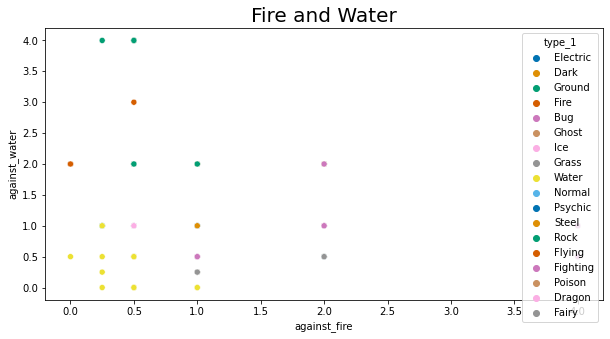

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='against_fire',y='against_water',data=train,hue='type_1', palette='colorblind')
plt.title('Fire and Water', fontsize = 20)
plt.show()


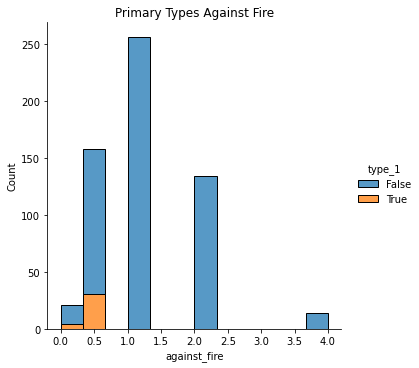

In [28]:
sns.displot(train, x='against_fire', hue = train.type_1=='Fire', multiple= 'stack')
plt.title('Primary Types Against Fire')
plt.show()

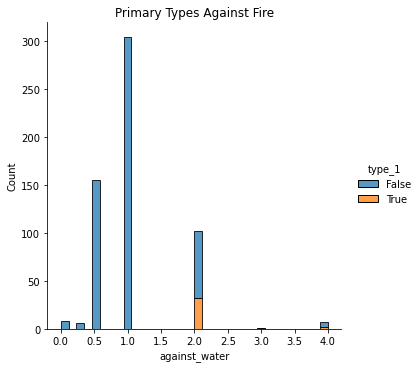

In [40]:
sns.displot(train, x='against_water', hue = train.type_1=='Fire', multiple='stack')
plt.title('Primary Types Against Fire')
plt.show()

In [29]:
train.columns

Index(['name', 'generation', 'status', 'species', 'type_number', 'type_1',
       'type_2', 'height_m', 'weight_kg', 'abilities_number', 'ability_1',
       'ability_2', 'ability_hidden', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'growth_rate',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

In [155]:
def fire_against_types(train, x, hue, multiple='stack'):
    cols = train.columns[21:]
    for i in cols:
        sns.displot(train, x=i, hue= train.type_1=='Fire', multiple='stack')

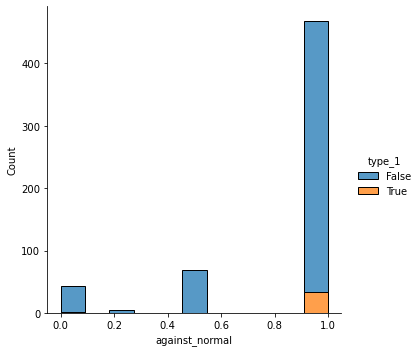

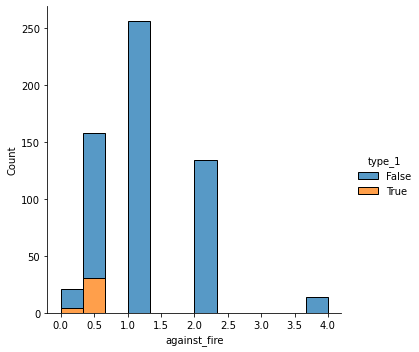

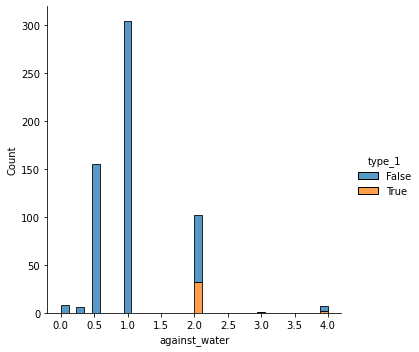

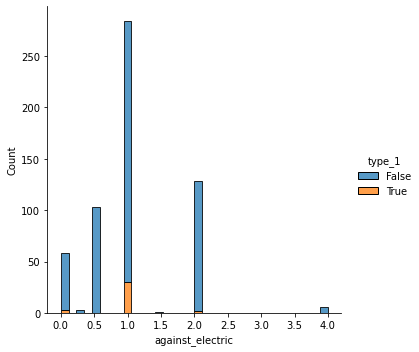

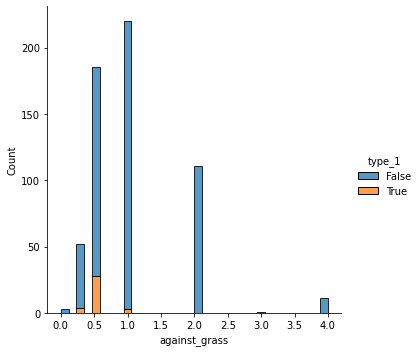

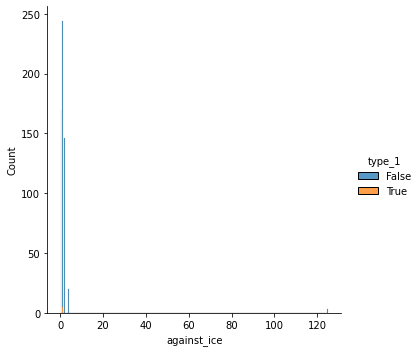

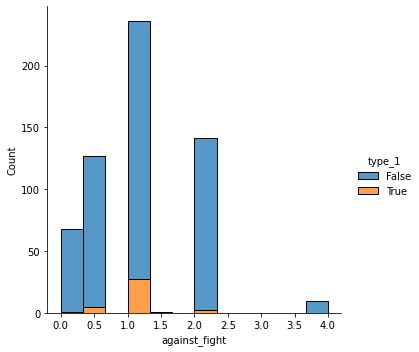

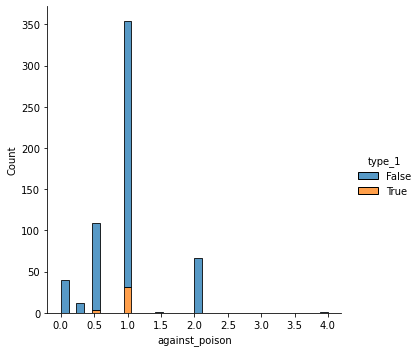

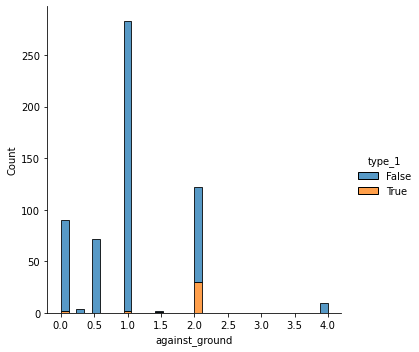

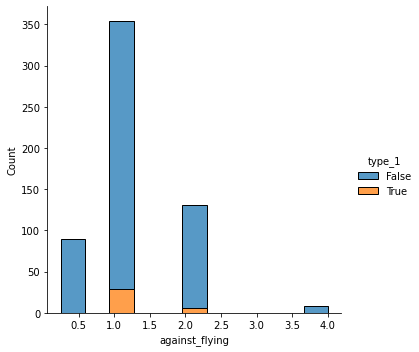

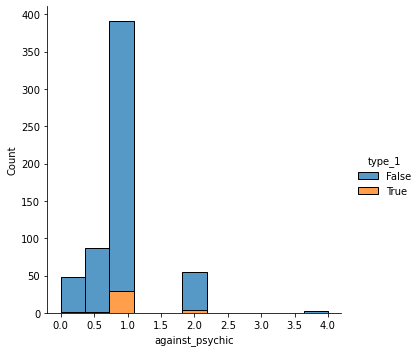

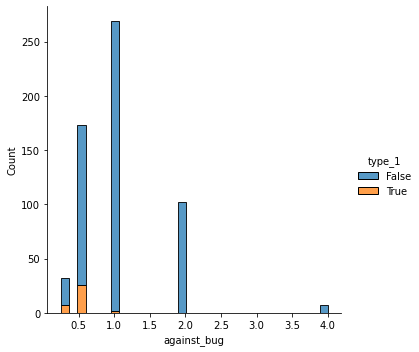

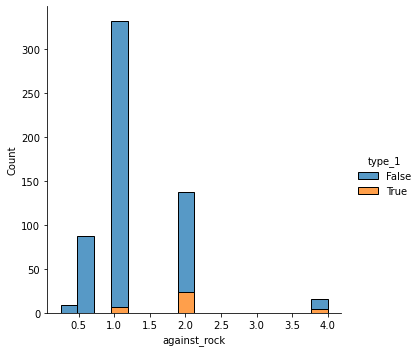

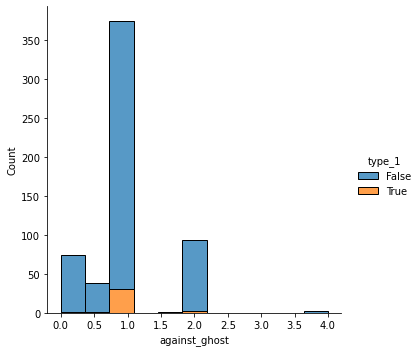

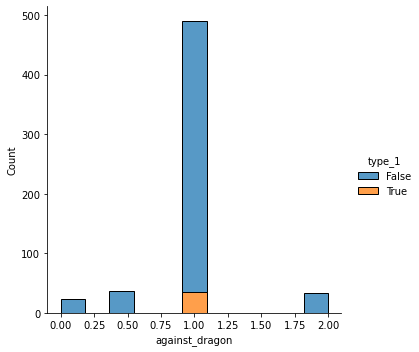

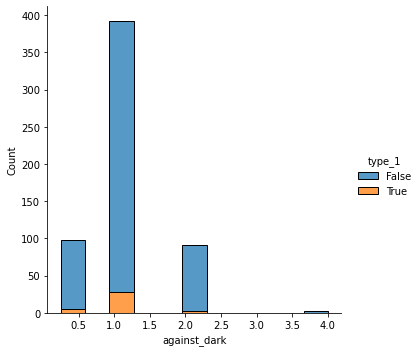

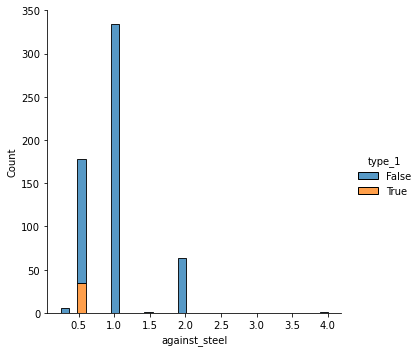

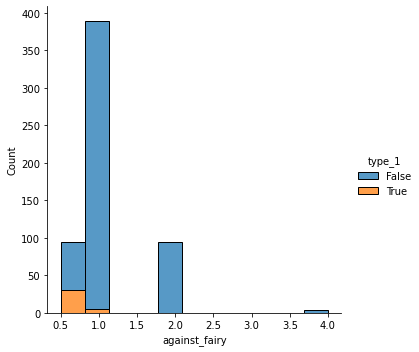

In [45]:
cols = train.columns[21:]
hue = train.type_1=='Fire'
for i in cols:
    sns.displot(train, x=i, hue=train.type_1=='Fire', multiple='stack')
    plt.show()

In [61]:
# for col in train.columns[21:]:
#     plt.hist(train[col])
#     plt.title(col)
#     plt.show()

In [47]:
df.against_ice.max()

125.0

In [51]:
df[df.against_ice==125]

,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
114,Dewgong,1,Normal,Sea Lion Pokémon,2,Water,Ice,1.7,120.0,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
434,Spheal,3,Normal,Clap Pokémon,2,Ice,Water,0.8,39.5,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
435,Sealeo,3,Normal,Ball Roll Pokémon,2,Ice,Water,1.1,87.6,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
436,Walrein,3,Normal,Ice Break Pokémon,2,Ice,Water,1.4,150.6,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#what's with those outliers on against_ice

In [60]:
df = df[(np.abs(stats.zscore(df['against_ice'])) < 3)]

In [62]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)

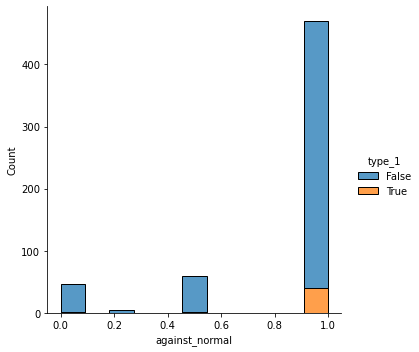

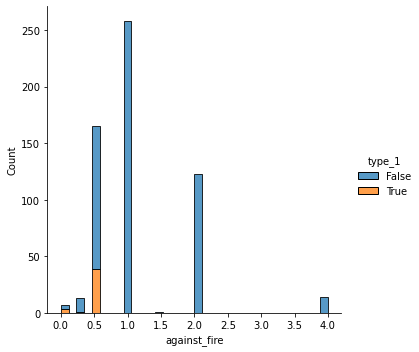

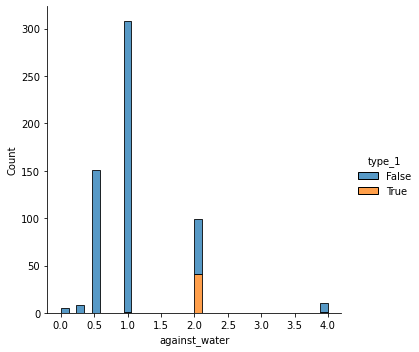

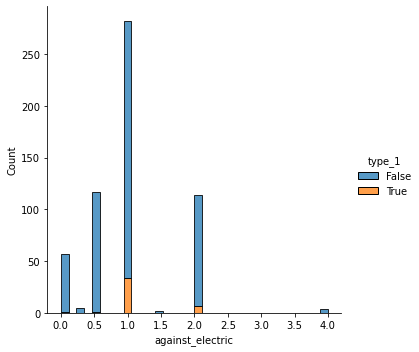

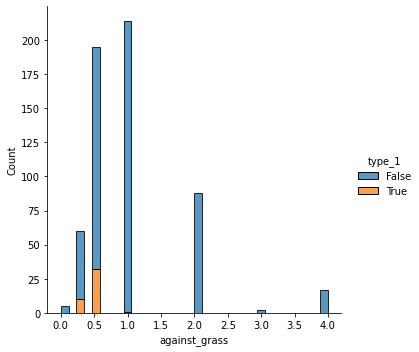

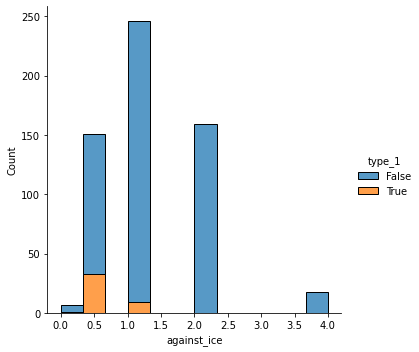

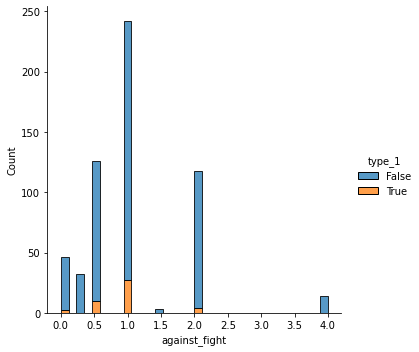

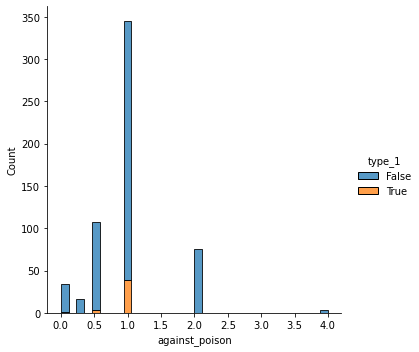

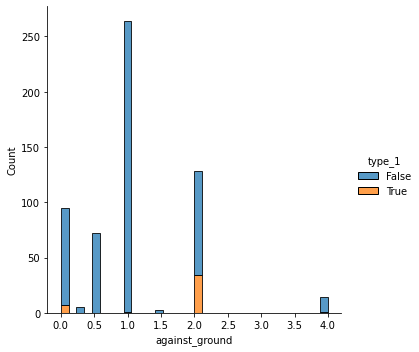

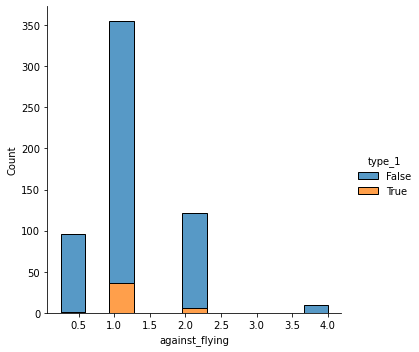

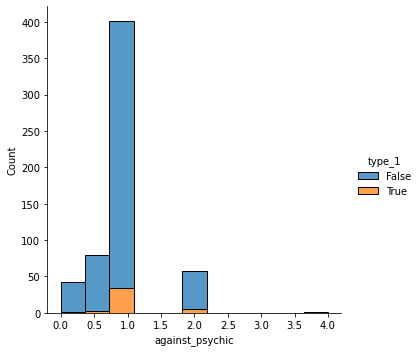

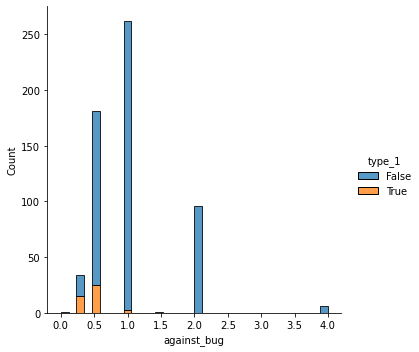

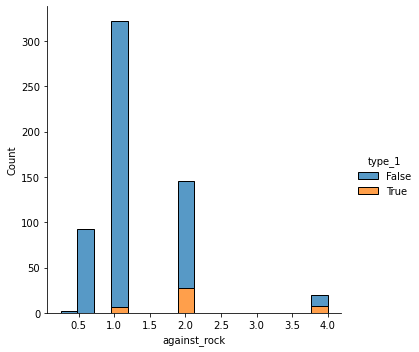

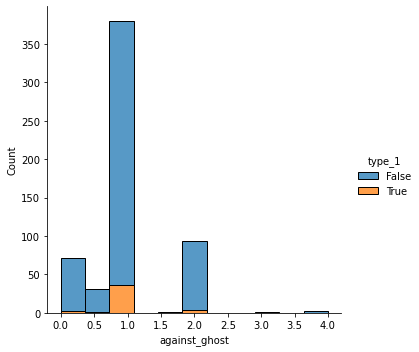

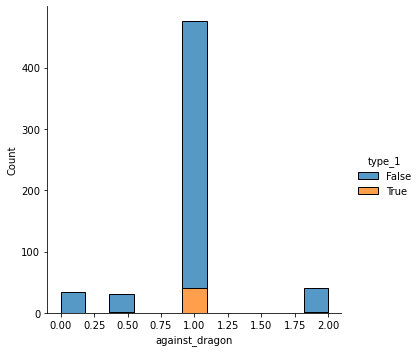

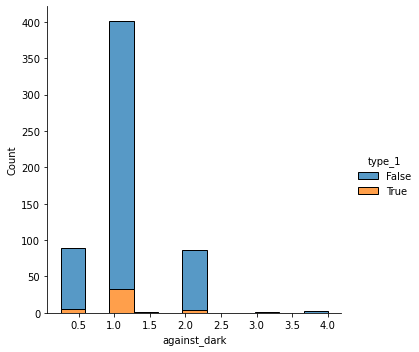

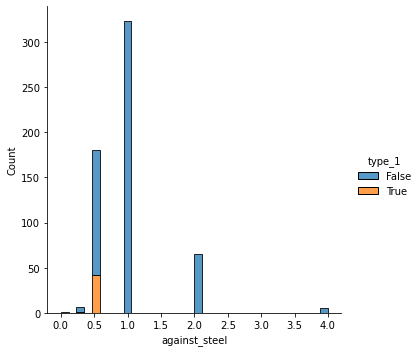

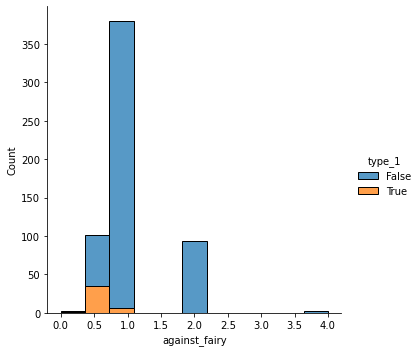

In [63]:
cols = train.columns[21:]
hue = train.type_1=='Fire'
for i in cols:
    sns.displot(train, x=i, hue=train.type_1=='Fire', multiple='stack')
    plt.show()

if the orange is in the middle/right parts of the graph, it means my Scorbunny is weak/significantly affected by it 
I did not include normal or dragon because the highest value for normal is 1, and the highest value of dragon is 2 when the norm scale is 0-4. 

So here are the types I need to look out for:

- Water
- Ground 
- Rock 

In [136]:
#Thank you Xavier!!!!
df.loc[(df['type_1']== "Water") | (df['type_1']== "Ground") | (df['type_1']== "Rock"), "is_weakness"] = 1

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [139]:
#Thanks Xavier for helping me make this column. 
df.is_weakness = df.is_weakness.fillna(0)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [149]:
df['is_weakness']= (df['is_weakness']).astype(int)

In [153]:
df.columns

Index(['name', 'generation', 'status', 'species', 'type_number', 'type_1',
       'type_2', 'height_m', 'weight_kg', 'abilities_number', 'ability_1',
       'ability_2', 'ability_hidden', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'growth_rate',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy', 'is_weakness'],
      dtype='object')

# Ready for Battle!!! (ready for battle, right?)

In [3]:
df = get_pokemon()

In [4]:
df = ready_for_battle(df)

In [5]:
df

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,is_weakness
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,896,Glastrier,8,Sub Legendary,Wild Horse Pokémon,1,Ice,None,2.2,800.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0
1034,897,Spectrier,8,Sub Legendary,Swift Horse Pokémon,1,Ghost,None,2.0,44.5,...,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,0
1035,898,Calyrex,8,Legendary,King Pokémon,2,Psychic,Grass,1.1,7.7,...,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,0
1036,898,Calyrex Ice Rider,8,Legendary,High King Pokémon,2,Psychic,Ice,2.4,809.1,...,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,0


0